<a href="https://colab.research.google.com/github/Debanjalee1210/CEN-598-Embedded-Machine-Learning/blob/main/P5_HW_EML_phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
import numpy as np



In [4]:
# Define class names for CIFAR-10
class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

In [5]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()


170498071/170498071 [==============================] - 4s 0us/step


In [6]:
# Normalize the pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

In [7]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
x_test.shape

(10000, 32, 32, 3)

In [9]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


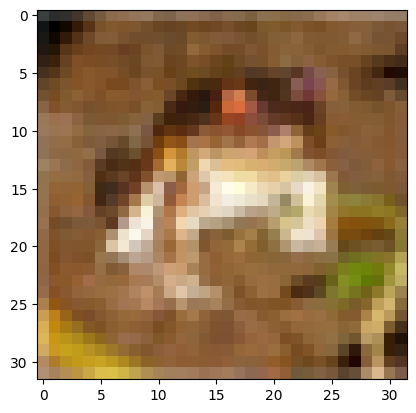

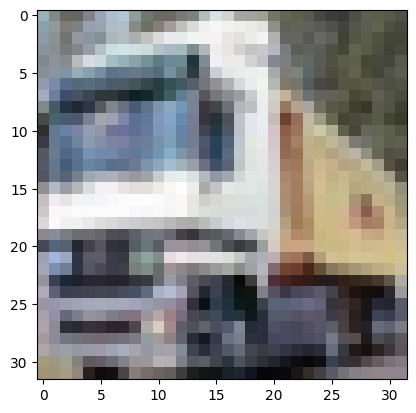

In [10]:
plt.imshow(x_train[0])
plt.show()
#plt.imshow(y_train[0])
#plt.show()
plt.imshow(x_train[1])
plt.show()

In [ ]:
print(y_train[0])

[6]


In [ ]:
print(y_train[1])

[9]


In [ ]:
from sklearn.utils import shuffle

In [ ]:
x_train,y_train = shuffle(x_train,y_train)
x_test,y_test = shuffle(x_test,y_test)

In [ ]:
print(y_train[0])

[9]


In [ ]:
print(y_train[1])

[4]


In [ ]:
pivot = int(x_train.shape[0]*0.8)
x_val = x_train[pivot:]
y_val = y_train[pivot:]
x_train = x_train[:pivot]
y_train = y_train[:pivot]

In [ ]:
x_train=x_train.reshape(-1,32,32,3)
x_val=x_val.reshape(-1,32,32,3)
x_test=x_test.reshape(-1,32,32,3)

In [ ]:
print(x_train.shape,x_val.shape,x_test.shape)

(40000, 32, 32, 3) (10000, 32, 32, 3) (10000, 32, 32, 3)


In [ ]:
print(y_train.shape,y_val.shape,y_test.shape)

(40000, 1) (10000, 1) (10000, 1)


In [ ]:
# One-hot encode the labels
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

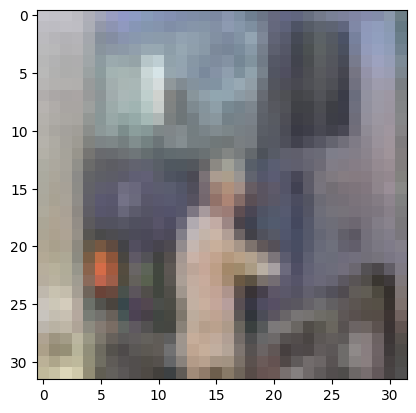

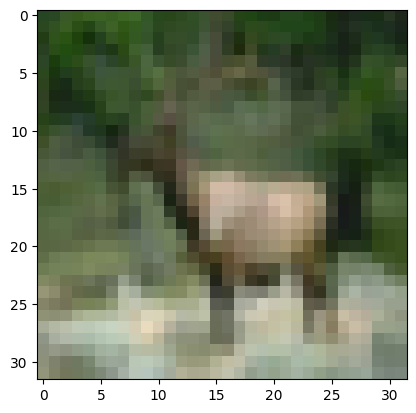

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(x_train[0])
plt.show()
#plt.imshow(y_train[0])
#plt.show()
plt.imshow(x_train[1])
plt.show()

In [ ]:
print(y_train[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
# Define the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
# Train the model
history = model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=10)


Epoch 1/10
1250/1250 [==============================] - 65s 51ms/step - loss: 1.4383 - accuracy: 0.4848 - val_loss: 1.2011 - val_accuracy: 0.5789
Epoch 2/10
1250/1250 [==============================] - 64s 51ms/step - loss: 1.0814 - accuracy: 0.6212 - val_loss: 1.0552 - val_accuracy: 0.6292
Epoch 3/10
1250/1250 [==============================] - 67s 54ms/step - loss: 0.9370 - accuracy: 0.6736 - val_loss: 0.9740 - val_accuracy: 0.6645
Epoch 4/10
1250/1250 [==============================] - 63s 50ms/step - loss: 0.8306 - accuracy: 0.7114 - val_loss: 0.9106 - val_accuracy: 0.6888
Epoch 5/10
1250/1250 [==============================] - 62s 50ms/step - loss: 0.7375 - accuracy: 0.7436 - val_loss: 0.9560 - val_accuracy: 0.6784
Epoch 6/10
1250/1250 [==============================] - 62s 50ms/step - loss: 0.6596 - accuracy: 0.7706 - val_loss: 0.8998 - val_accuracy: 0.7050
Epoch 7/10
1250/1250 [==============================] - 60s 48ms/step - loss: 0.5821 - accuracy: 0.7963 - val_loss: 0.9009 -

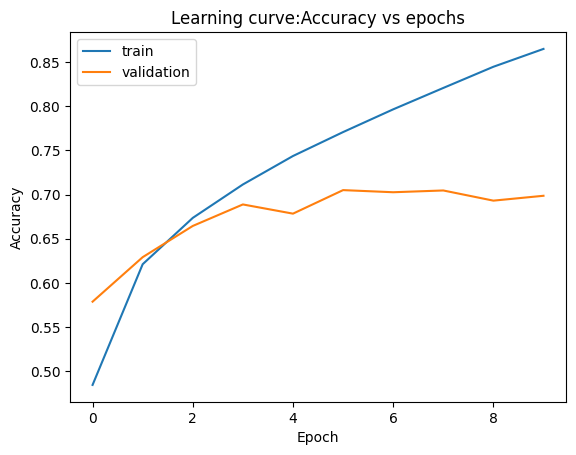

In [ ]:
# Evaluate the model
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Learning curve:Accuracy vs epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validation'])
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 4s 13ms/step - loss: 1.0658 - accuracy: 0.6927
Test accuracy: 0.6927000284194946


In [ ]:
ypred=model.predict(x_test).argmax(axis=1)
print(ypred)

313/313 [==============================] - 6s 17ms/step
[1 1 2 ... 4 1 0]


In [ ]:
np.set_printoptions(suppress=True)
raw_predictions=model.predict(x_test)
print(raw_predictions[0]) #the output from the model.

313/313 [==============================] - 5s 15ms/step
[0.00000554 0.99761635 0.00000001 0.00000076 0.00000002 0.00000007
 0.00000008 0.00000001 0.00161329 0.00076388]


In [ ]:
#class with max probability for this image
ypred = raw_predictions.argmax(axis=1)
print(ypred[0])

1


In [ ]:
#print(y_test[0]) #lets compare with the actual label
print(y_test[0])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# Print the predicted class name
predicted_class_name = class_names[ypred[0]]
print(f'Predicted class: {predicted_class_name}')

Predicted class: automobile
